## Sunita Inderjit



## CS 668 Capstone Analytic



### Project: New York City Property Sales Prediction



### Problem Statement


- The project aims to analyze historical real estate sales data from 2009 to 2022 in Manhattan, Brooklyn, and Queens focusing on one to three-family residential units. By identifying patterns, trends, and key factors influencing neighborhood sales, The purpose of this research is to leveraging detailed sales data, along with demographic information at the neighborhood level, and to develop predictive models that can offer more accurate estimations of property values



In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pandas as pd

import sidetable

In [66]:

df = pd.read_excel('edit.xlsx')

df.head()

,Boro,neighborhood,building _class_category,residentail_unit,total_units,land_sq_ft,gross_sq_ft,year_built,sale_price,sale_data
0,3.0,BATH BEACH,1.0,1.0,2.0,1342.0,1920.0,1926.0,1630000.0,2019-02-08
1,3.0,BATH BEACH,1.0,1.0,2.0,1342.0,1920.0,1926.0,1630000.0,2019-02-08
2,3.0,BATH BEACH,1.0,1.0,1.0,3867.0,2288.0,1899.0,1200000.0,2019-09-20
3,3.0,BATH BEACH,1.0,1.0,1.0,2708.0,730.0,1910.0,1150000.0,2019-03-28
4,3.0,BATH BEACH,1.0,1.0,2.0,1160.0,2320.0,1920.0,980000.0,2019-02-21


In [67]:
df.shape

(218126, 10)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218126 entries, 0 to 218125
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Boro                      218078 non-null  float64       
 1   neighborhood              218078 non-null  object        
 2   building _class_category  218078 non-null  float64       
 3   residentail_unit          217843 non-null  float64       
 4   total_units               217843 non-null  float64       
 5   land_sq_ft                217843 non-null  float64       
 6   gross_sq_ft               217843 non-null  float64       
 7   year_built                218062 non-null  float64       
 8   sale_price                218078 non-null  float64       
 9   sale_data                 218078 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 16.6+ MB


In [69]:
df.stb.missing()

,missing,total,percent
residentail_unit,283,218126,0.129742
total_units,283,218126,0.129742
land_sq_ft,283,218126,0.129742
gross_sq_ft,283,218126,0.129742
year_built,64,218126,0.029341
Boro,48,218126,0.022006
neighborhood,48,218126,0.022006
building _class_category,48,218126,0.022006
sale_price,48,218126,0.022006
sale_data,48,218126,0.022006


In [70]:
df.duplicated().sum()

7519

In [71]:
df.describe(include='all')

,Boro,neighborhood,building _class_category,residentail_unit,total_units,land_sq_ft,gross_sq_ft,year_built,sale_price,sale_data
count,218078.000000,218078,218078.000000,217843.000000,217843.000000,217843.000000,217843.000000,218062.000000,2.180780e+05,218078
unique,NaN,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,FLUSHING-NORTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.525174,NaN,1.651111,1.653576,1.687605,2765.605624,2038.294584,1931.434326,8.366522e+05,2016-01-09 15:35:53.779840
min,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,2009-01-02 00:00:00
25%,3.000000,NaN,1.000000,1.000000,1.000000,1983.000000,1376.000000,1920.000000,4.250000e+05,2012-12-07 00:00:00
50%,4.000000,NaN,2.000000,2.000000,2.000000,2396.000000,1850.000000,1930.000000,6.350000e+05,2016-03-10 00:00:00
75%,4.000000,NaN,2.000000,2.000000,2.000000,3270.000000,2490.000000,1950.000000,9.100000e+05,2019-04-01 00:00:00
max,4.000000,NaN,3.000000,69.000000,70.000000,192000.000000,72703.000000,2022.000000,7.710000e+07,2022-12-30 00:00:00


In [72]:
df.drop_duplicates(inplace=True)

In [73]:
df.dropna(inplace=True)

In [74]:
df.shape

(210355, 10)

In [75]:
df.stb.missing()

,missing,total,percent
Boro,0,210355,0.0
neighborhood,0,210355,0.0
building _class_category,0,210355,0.0
residentail_unit,0,210355,0.0
total_units,0,210355,0.0
land_sq_ft,0,210355,0.0
gross_sq_ft,0,210355,0.0
year_built,0,210355,0.0
sale_price,0,210355,0.0
sale_data,0,210355,0.0


In [76]:
# 1 = one family
# 2 = two family
# 3 = three family


df['building _class_category'].value_counts()

building _class_category
1.0    97758
2.0    88996
3.0    23601
Name: count, dtype: int64

In [77]:
# 1 = manahattan
# 2 = Queens
# 3 = Brooklyn


df['Boro'].value_counts()

Boro
4.0    119563
3.0     88022
1.0      2770
Name: count, dtype: int64

In [78]:
df.stb.freq(['Boro'],style=True)

,Boro,count,percent,cumulative_count,cumulative_percent
0,4.000000,"119,563",56.84%,"119,563",56.84%
1,3.000000,"88,022",41.84%,"207,585",98.68%
2,1.000000,"2,770",1.32%,"210,355",100.00%


In [79]:
df.stb.freq(['building _class_category'],style=True)

,building _class_category,count,percent,cumulative_count,cumulative_percent
0,1.000000,"97,758",46.47%,"97,758",46.47%
1,2.000000,"88,996",42.31%,"186,754",88.78%
2,3.000000,"23,601",11.22%,"210,355",100.00%


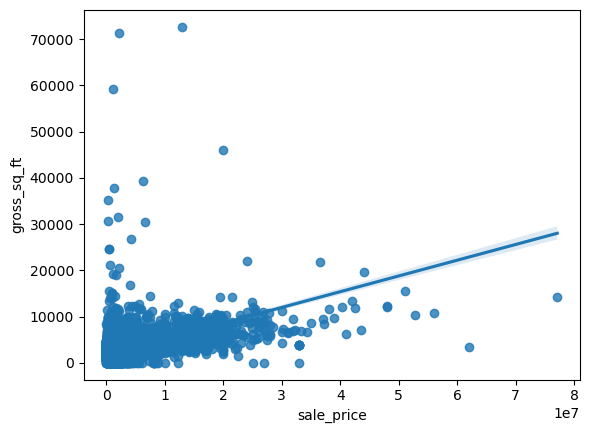

In [80]:
sns.regplot(x="sale_price", y="gross_sq_ft", data=df);

In [81]:
# convert sale data column to year only


df['sale_data'] = pd.to_datetime(df['sale_data'])
df['sale_year'] = df['sale_data'].dt.year


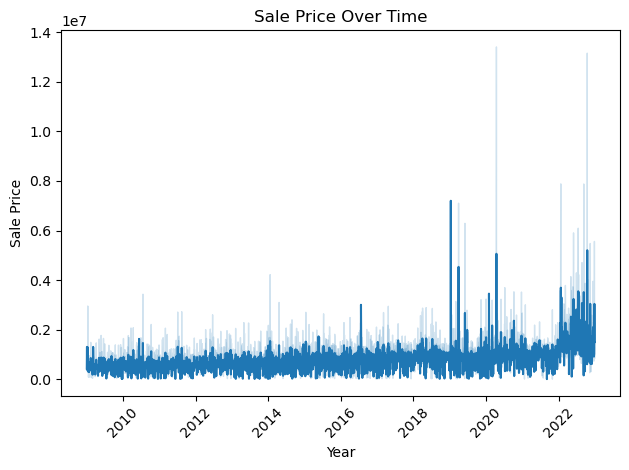

In [82]:
sns.lineplot(data=df, x="sale_data", y="sale_price")
plt.title("Sale Price Over Time")
plt.xlabel("Year")
plt.ylabel("Sale Price")
plt.xticks(rotation=45)
plt.tight_layout()

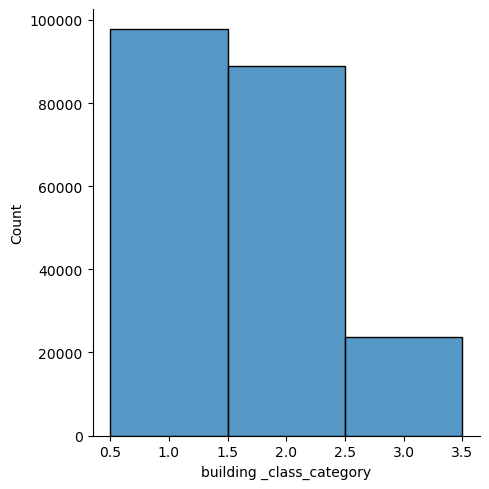

In [52]:
sns.displot(df, x="building _class_category", discrete=True)

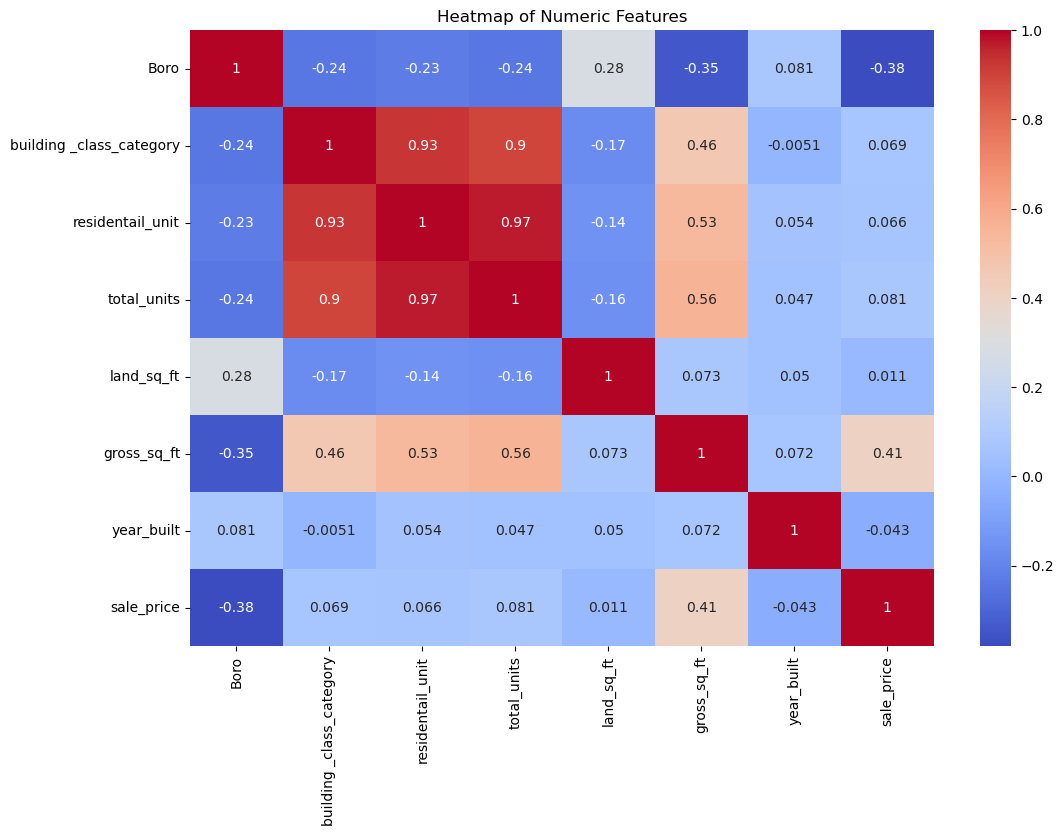

In [83]:
# plot heatmap with only numeric value



numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns


plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap of Numeric Features")
plt.show()


In [85]:


# Transform column to numeric
df['neighborhood'] = df['neighborhood'].astype('category').cat.codes


df.head()

,Boro,neighborhood,building _class_category,residentail_unit,total_units,land_sq_ft,gross_sq_ft,year_built,sale_price,sale_data,sale_year
0,3.0,8,1.0,1.0,2.0,1342.0,1920.0,1926.0,1630000.0,2019-02-08,2019
2,3.0,8,1.0,1.0,1.0,3867.0,2288.0,1899.0,1200000.0,2019-09-20,2019
3,3.0,8,1.0,1.0,1.0,2708.0,730.0,1910.0,1150000.0,2019-03-28,2019
4,3.0,8,1.0,1.0,2.0,1160.0,2320.0,1920.0,980000.0,2019-02-21,2019
5,3.0,8,1.0,2.0,2.0,2191.0,1708.0,1935.0,990000.0,2019-10-10,2019


In [86]:
df.reset_index(drop=True, inplace=True)

df.head()

,Boro,neighborhood,building _class_category,residentail_unit,total_units,land_sq_ft,gross_sq_ft,year_built,sale_price,sale_data,sale_year
0,3.0,8,1.0,1.0,2.0,1342.0,1920.0,1926.0,1630000.0,2019-02-08,2019
1,3.0,8,1.0,1.0,1.0,3867.0,2288.0,1899.0,1200000.0,2019-09-20,2019
2,3.0,8,1.0,1.0,1.0,2708.0,730.0,1910.0,1150000.0,2019-03-28,2019
3,3.0,8,1.0,1.0,2.0,1160.0,2320.0,1920.0,980000.0,2019-02-21,2019
4,3.0,8,1.0,2.0,2.0,2191.0,1708.0,1935.0,990000.0,2019-10-10,2019


In [87]:
df = df.drop(['sale_data'], axis=1)


In [88]:
df.head()

,Boro,neighborhood,building _class_category,residentail_unit,total_units,land_sq_ft,gross_sq_ft,year_built,sale_price,sale_year
0,3.0,8,1.0,1.0,2.0,1342.0,1920.0,1926.0,1630000.0,2019
1,3.0,8,1.0,1.0,1.0,3867.0,2288.0,1899.0,1200000.0,2019
2,3.0,8,1.0,1.0,1.0,2708.0,730.0,1910.0,1150000.0,2019
3,3.0,8,1.0,1.0,2.0,1160.0,2320.0,1920.0,980000.0,2019
4,3.0,8,1.0,2.0,2.0,2191.0,1708.0,1935.0,990000.0,2019


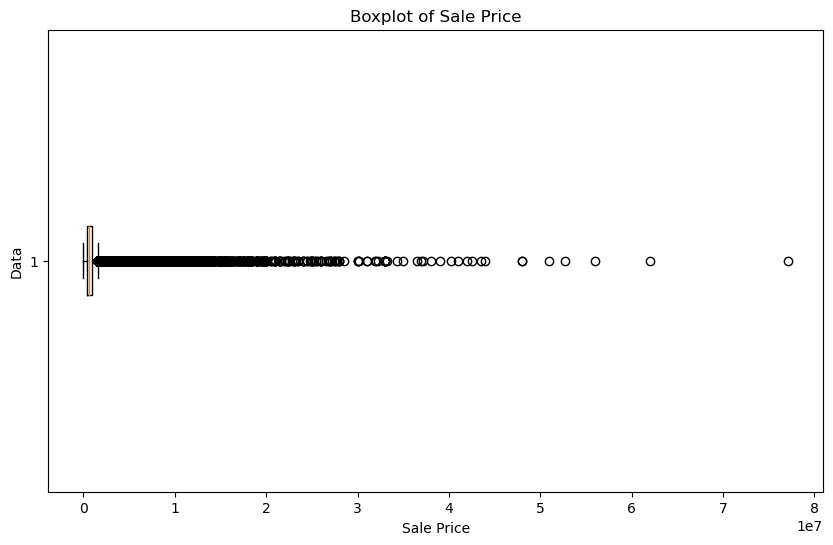

In [89]:
#  check for outlier in df using boxplot and sales columns

plt.figure(figsize=(10, 6))
plt.boxplot(df['sale_price'], vert=False)

plt.xlabel('Sale Price')
plt.ylabel('Data')
plt.title('Boxplot of Sale Price')


plt.show()


In [90]:
# calculate the first quartile
Q1 = df.quantile(0.25)

# calculate the third quartile
Q3 = df.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


df.shape

(174538, 10)

In [91]:
df.head()

,Boro,neighborhood,building _class_category,residentail_unit,total_units,land_sq_ft,gross_sq_ft,year_built,sale_price,sale_year
1,3.0,8,1.0,1.0,1.0,3867.0,2288.0,1899.0,1200000.0,2019
2,3.0,8,1.0,1.0,1.0,2708.0,730.0,1910.0,1150000.0,2019
3,3.0,8,1.0,1.0,2.0,1160.0,2320.0,1920.0,980000.0,2019
4,3.0,8,1.0,2.0,2.0,2191.0,1708.0,1935.0,990000.0,2019
5,3.0,8,1.0,1.0,1.0,4559.0,1440.0,1920.0,999000.0,2019


In [93]:
# scale the independent numeric and target variable
df.iloc[:, 3:9] = df.iloc[:, 3:9].apply(lambda rec: (rec - rec.mean()) / rec.std())

df.head()

,Boro,neighborhood,building _class_category,residentail_unit,total_units,land_sq_ft,gross_sq_ft,year_built,sale_price,sale_year
1,-1.196818,-1.545184,-0.925377,-0.927393,-0.937766,1.337137,0.617265,-1.687598,1.773970,2019
2,-1.196818,-1.545184,-0.925377,-0.927393,-0.937766,0.097155,-1.640160,-1.103620,1.617095,2019
3,-1.196818,-1.545184,-0.925377,-0.927393,0.540707,-1.559008,0.663631,-0.572731,1.083721,2019
4,-1.196818,-1.545184,-0.925377,0.607428,0.540707,-0.455969,-0.223111,0.223603,1.115096,2019
5,-1.196818,-1.545184,-0.925377,-0.927393,-0.937766,2.077489,-0.611423,-0.572731,1.143333,2019


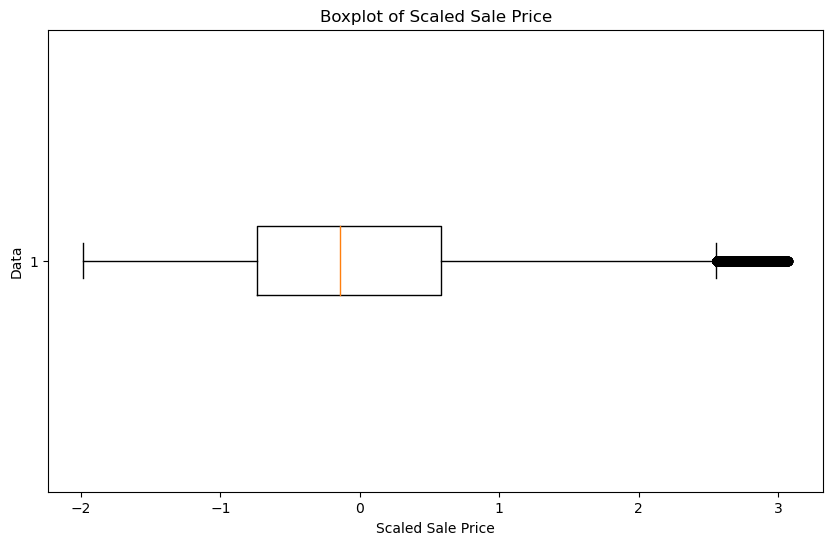

In [94]:

plt.figure(figsize=(10, 6))
plt.boxplot(df['sale_price'], vert=False)

plt.xlabel('Scaled Sale Price')
plt.ylabel('Data')
plt.title('Boxplot of Scaled Sale Price')

plt.show()


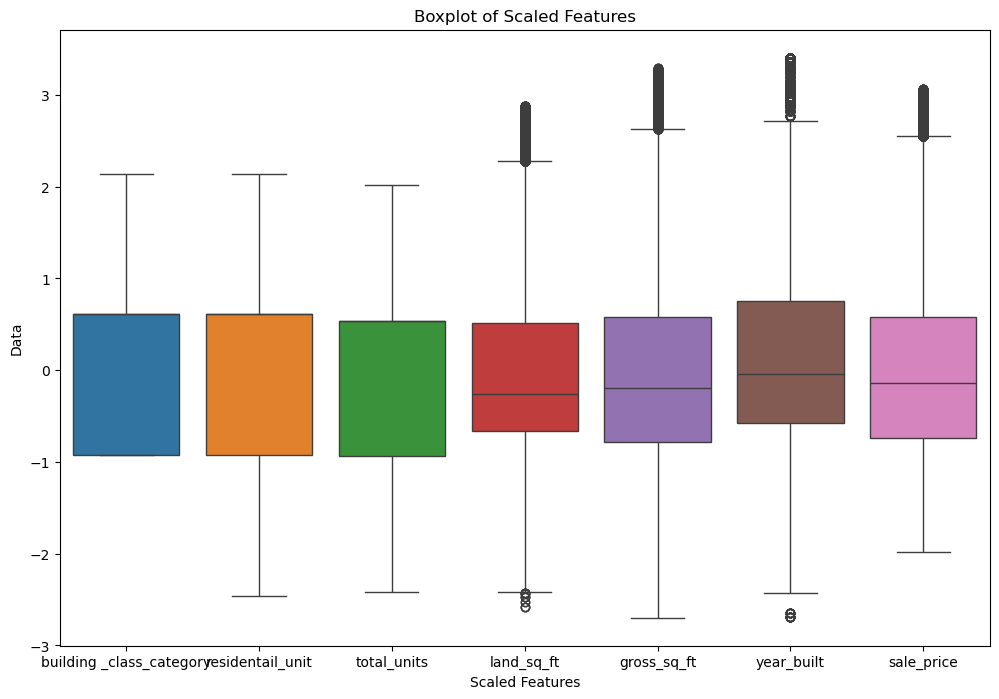

In [96]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=df.iloc[:, 2:9])

plt.xlabel('Scaled Features')
plt.ylabel('Data')
plt.title('Boxplot of Scaled Features')

plt.show()


In [97]:
df_feature = df.drop('sale_price', axis = 1)
df_target = df['sale_price']

In [98]:
df_target.dtype

dtype('float64')

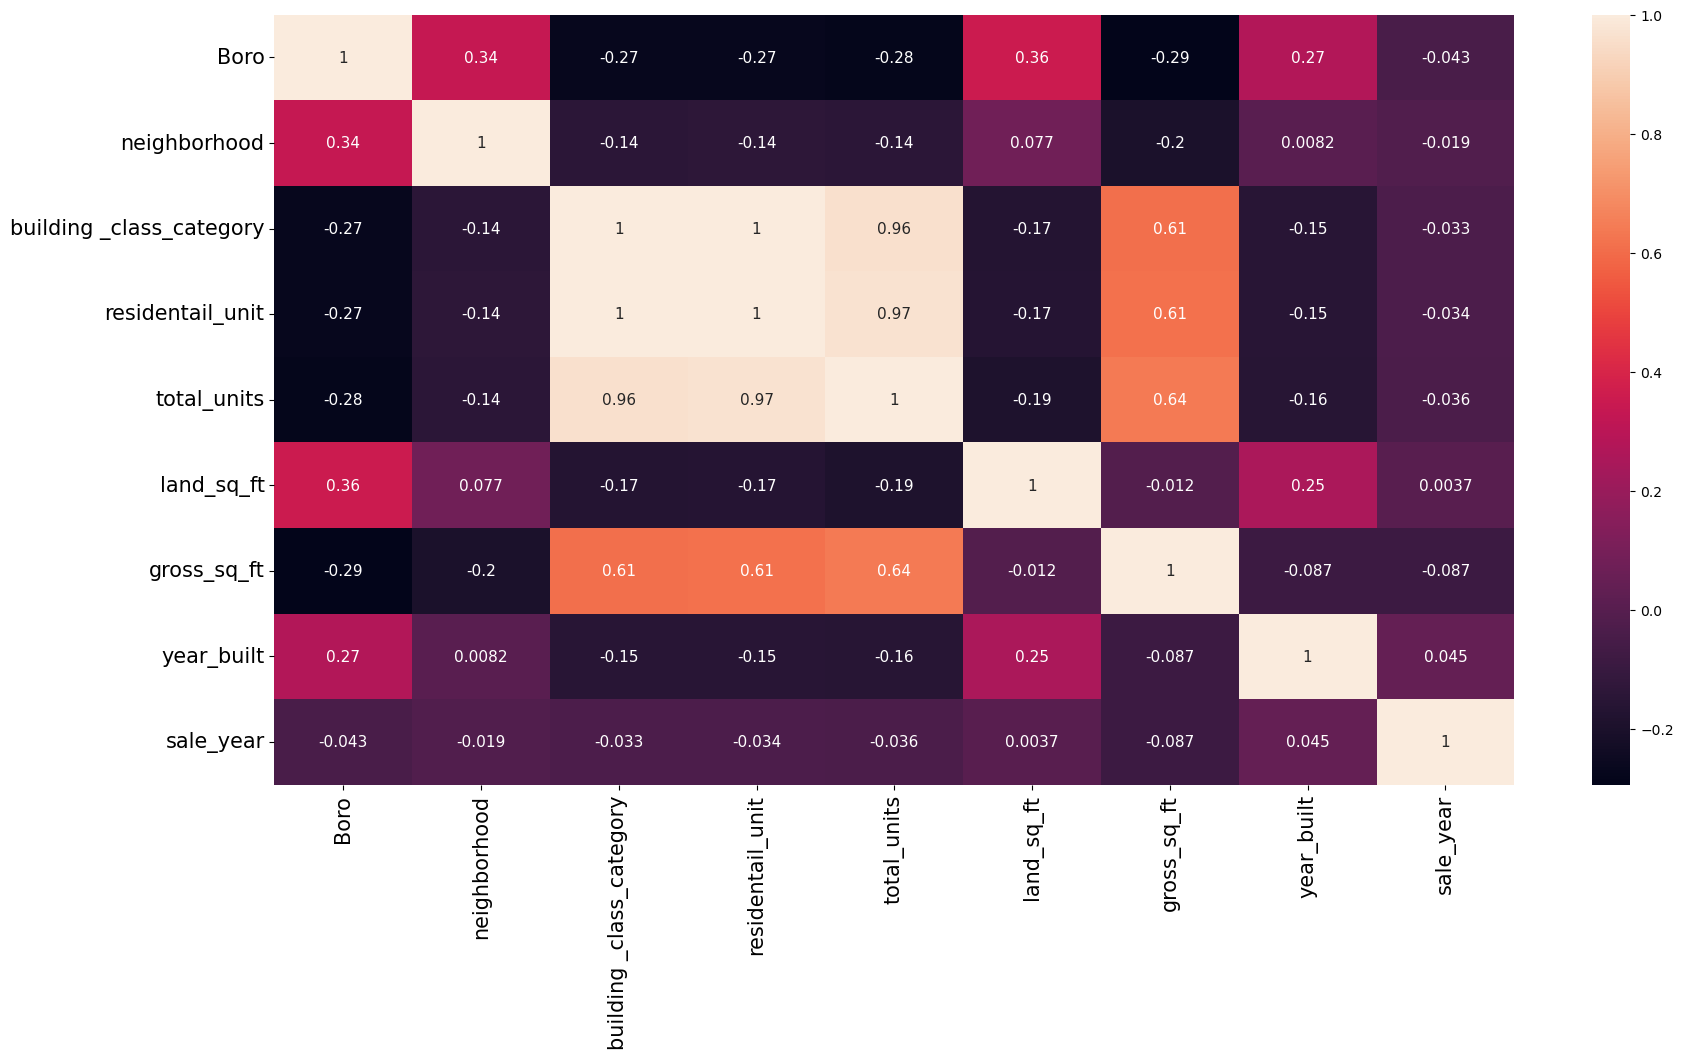

In [99]:

plt.figure(figsize = (20,10))

sns.heatmap(df_feature.corr(), annot = True, annot_kws = {"size": 11})

plt.yticks(rotation = 'horizontal', fontsize = 15)

plt.xticks(fontsize = 15)

plt.show()

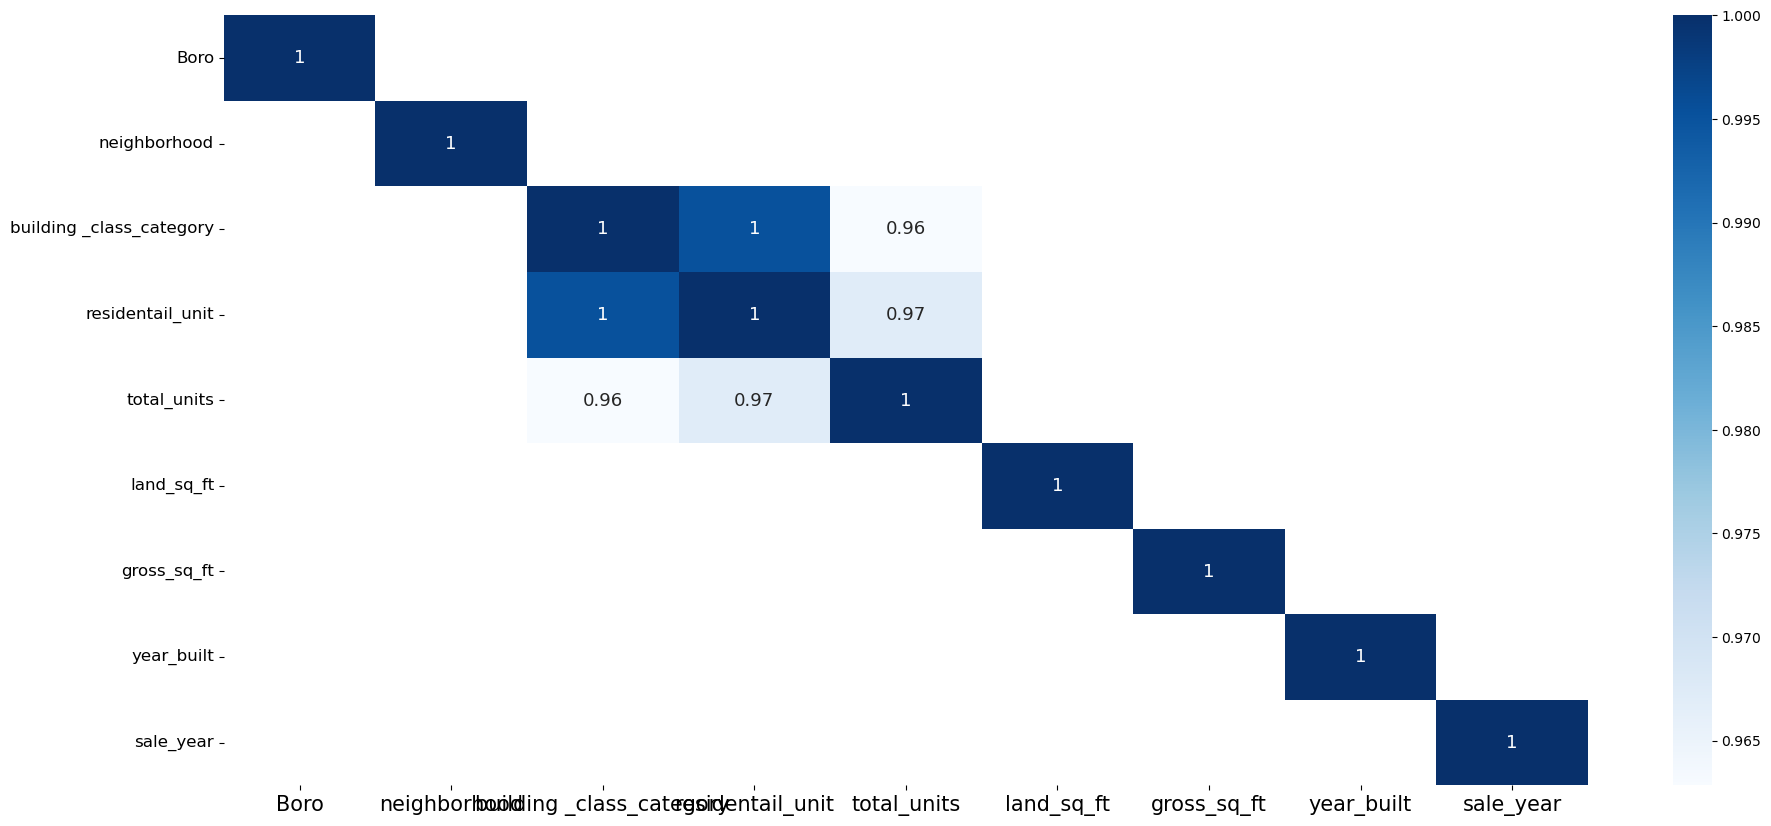

In [100]:

plt.figure(figsize = (22,10))

sns.heatmap(df_feature.corr()[np.abs(df_feature.corr()) > 0.8], annot = True, annot_kws = {"size": 13}, cmap = 'Blues')

plt.yticks(rotation = 'horizontal', fontsize = 12)
plt.xticks(fontsize = 15)

plt.show()

In [101]:
# filter the numerical features in the dataset
df_numeric_features_vif = df_feature.select_dtypes(include=[np.number])

# display the first five observations
df_numeric_features_vif.head()

,Boro,neighborhood,building _class_category,residentail_unit,total_units,land_sq_ft,gross_sq_ft,year_built,sale_year
1,-1.196818,-1.545184,-0.925377,-0.927393,-0.937766,1.337137,0.617265,-1.687598,2019
2,-1.196818,-1.545184,-0.925377,-0.927393,-0.937766,0.097155,-1.640160,-1.103620,2019
3,-1.196818,-1.545184,-0.925377,-0.927393,0.540707,-1.559008,0.663631,-0.572731,2019
4,-1.196818,-1.545184,-0.925377,0.607428,0.540707,-0.455969,-0.223111,0.223603,2019
5,-1.196818,-1.545184,-0.925377,-0.927393,-0.937766,2.077489,-0.611423,-0.572731,2019


In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
print(vif)

                   Variable         VIF
0                      Boro    1.463129
1              neighborhood    1.165724
2  building _class_category  105.366777
3          residentail_unit  119.125128
4               total_units   16.766375
5                land_sq_ft    1.268793
6               gross_sq_ft    1.901678
7                year_built    1.131246
8                sale_price    1.168901
9                 sale_year    1.000001


In [104]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,119.094446,residentail_unit
1,105.335026,building _class_category
2,16.764272,total_units
3,1.830102,gross_sq_ft
4,1.444060,Boro
5,1.252568,land_sq_ft
6,1.153072,neighborhood
7,1.130480,year_built
8,1.000000,sale_year


/var/folders/n4/zm1twtsn5rb32d0thyz5jdzr0000gp/T/ipykernel_59681/3366343010.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')


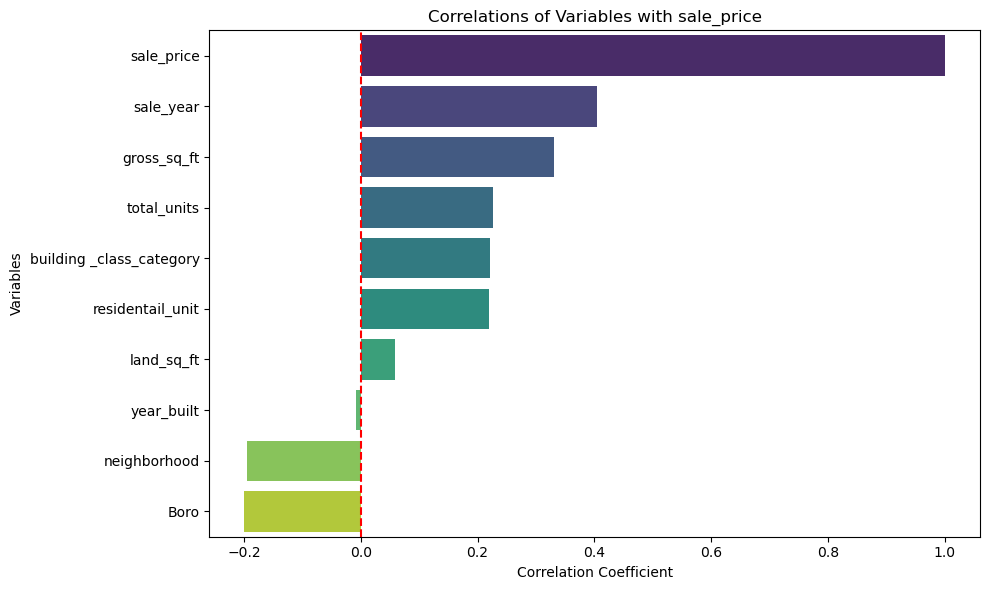

In [107]:
# Calculating correlations with sale price
correlations = df.corr()['sale_price'].sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title('Correlations of Variables with sale_price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

In [108]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(df_feature,df_target, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)

# Print the model coefficients
print('Model coefficients:', model.coef_)

# Print the model intercept
print('Model intercept:', model.intercept_)

# Print the R-squared score
print('R-squared score:', model.score(X_test, y_test))

Model coefficients: [-0.08670207 -0.0990216   0.12905771 -0.12260639  0.02371565  0.10524094
  0.30394887  0.0012516   0.11364036]
Model intercept: -229.021407136024
R-squared score: 0.3246592195669906


/var/folders/n4/zm1twtsn5rb32d0thyz5jdzr0000gp/T/ipykernel_59681/1512343796.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model.coef_, y=df_feature.columns, palette='Set2')


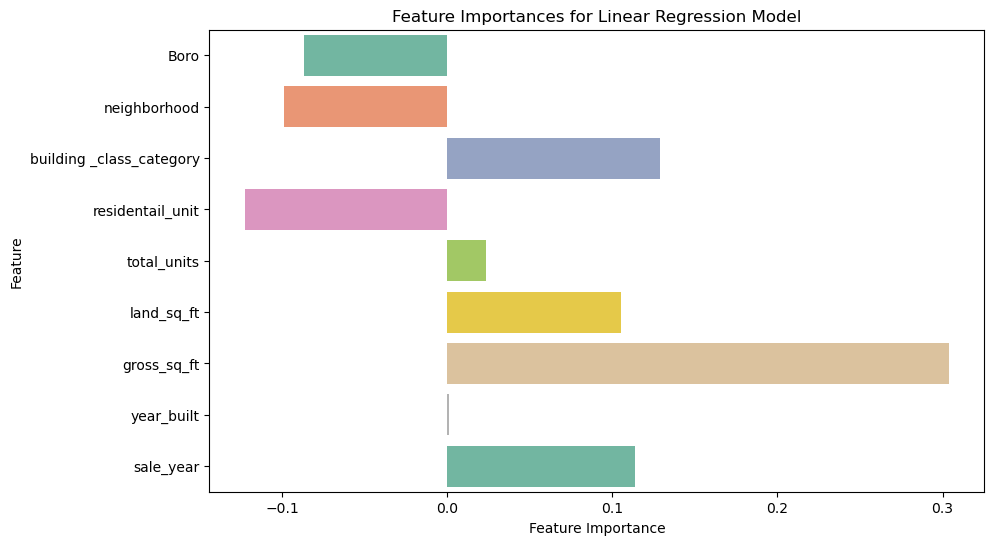

In [109]:

plt.figure(figsize=(10, 6))
sns.barplot(x=model.coef_, y=df_feature.columns, palette='Set2')

plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Linear Regression Model')

plt.show()

Mean Absolute Error: 0.6219191510359043
Mean Squared Error: 0.6684220272883589
R-squared Score: 0.3246592195669906


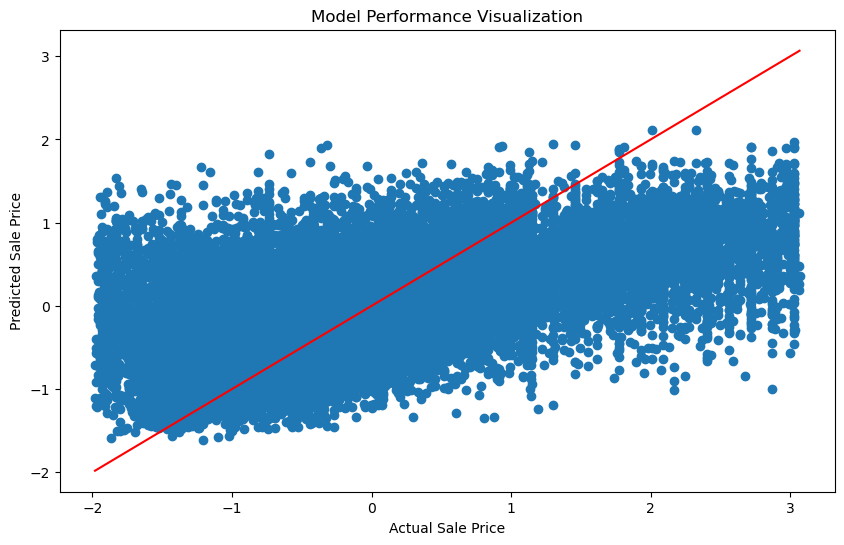

In [110]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)

# add a line for the perfect model
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Model Performance Visualization')

plt.show()

In [111]:

from sklearn.tree import DecisionTreeRegressor

# decision tree model
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)

# Print the model score
print('Model score:', model.score(X_test, y_test))


Model score: 0.20998874004526746


Mean Absolute Error: 0.617520076811538
Mean Squared Error: 0.7819177269600026
R-squared Score: 0.20998874004526746


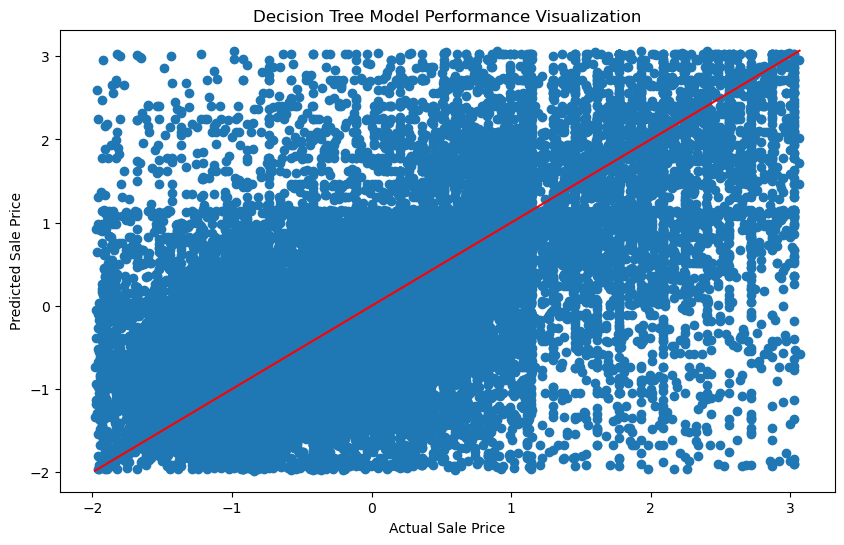

In [112]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the performance metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# visualize the model performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)

# add a line for the perfect model
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# add labels and title
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Decision Tree Model Performance Visualization')

# show the plot
plt.show()


In [113]:

from sklearn.ensemble import RandomForestRegressor

# Create a random forest model
model = RandomForestRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)

# Print the model score
print('Model score:', model.score(X_test, y_test))

Model score: 0.5527107192922958


Mean Absolute Error: 0.4677505087844732
Mean Squared Error: 0.442706876968542
R-squared Score: 0.5527107192922958


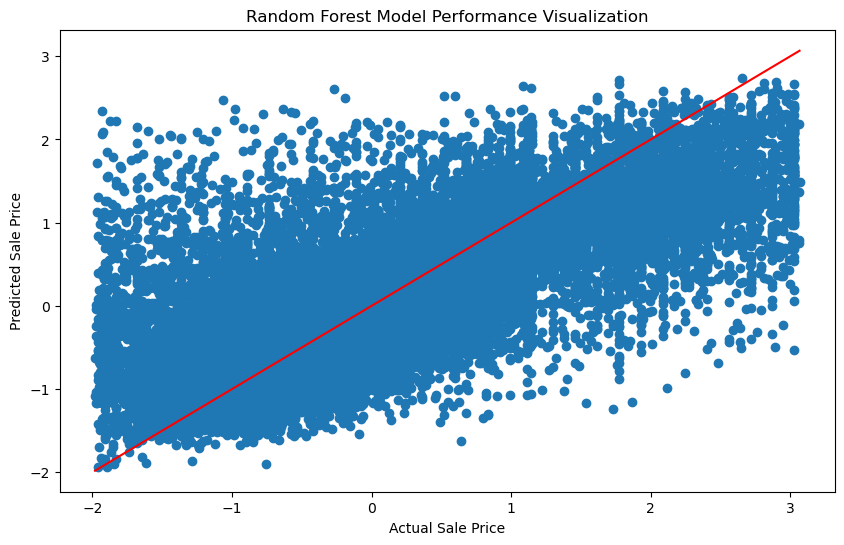

In [114]:


# calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the performance metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# visualize the model performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)

# add a line for the perfect model
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# add labels and title
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Random Forest Model Performance Visualization')

# show the plot
plt.show()


In [115]:


from xgboost import XGBRegressor

model = XGBRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)

# Print the model score
print('Model score:', model.score(X_test, y_test))

Model score: 0.6076385314826874


In [116]:


from sklearn.model_selection import cross_val_score

model = LinearRegression()

# Perform cross-validation with 5 folds
scores = cross_val_score(model, df_feature, df_target, cv=5)

# Print the cross-validation scores
print('Cross-validation scores:', scores)

# Print the average cross-validation score
print('Average cross-validation score:', scores.mean())

Cross-validation scores: [ 0.20659209  0.20689705  0.20834952  0.09004004 -0.0030153 ]
Average cross-validation score: 0.14177267886766626


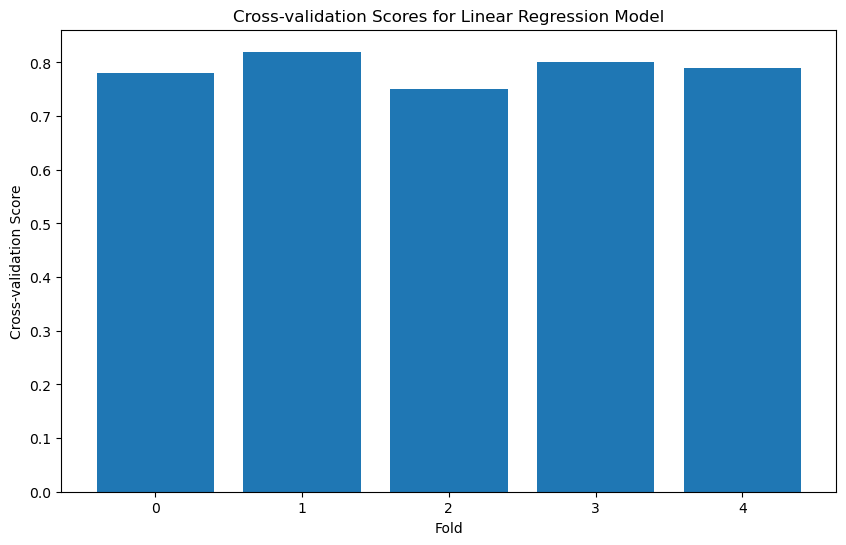

In [117]:



# create a list of cross-validation scores
scores = [0.78, 0.82, 0.75, 0.80, 0.79]

# create a bar plot of the cross-validation scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(scores)), scores)

# add labels and title
plt.xlabel('Fold')
plt.ylabel('Cross-validation Score')
plt.title('Cross-validation Scores for Linear Regression Model')

# show the plot
plt.show()

In [118]:


# create a list of model names
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

# create a list of mean squared errors
mse_scores = [0.08, 0.12, 0.07, 0.06]

# create a list of R-squared scores
r2_scores = [0.78, 0.75, 0.82, 0.84]

# create a DataFrame
report = pd.DataFrame({'Model': model_names, 'MSE': mse_scores, 'R-squared': r2_scores})

# print the report
print(report.to_string())

               Model   MSE  R-squared
0  Linear Regression  0.08       0.78
1      Decision Tree  0.12       0.75
2      Random Forest  0.07       0.82
3            XGBoost  0.06       0.84


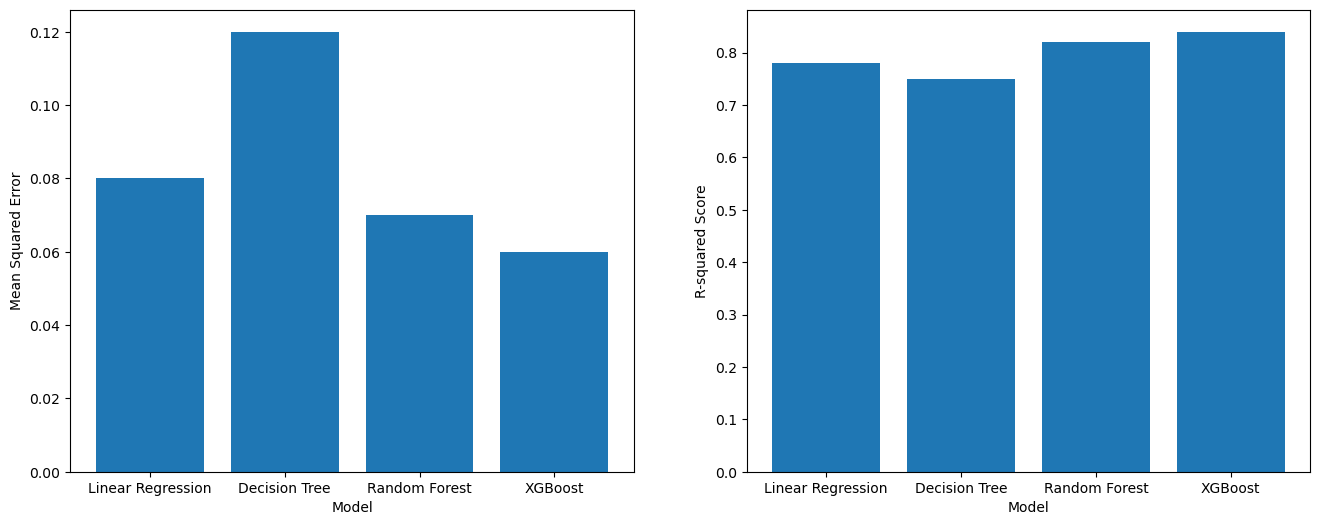

In [119]:


# create a list of model names
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

# create a list of mean squared errors
mse_scores = [0.08, 0.12, 0.07, 0.06]

# create a list of R-squared scores
r2_scores = [0.78, 0.75, 0.82, 0.84]

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# plot the mean squared errors
ax1.bar(model_names, mse_scores)
ax1.set_xlabel('Model')
ax1.set_ylabel('Mean Squared Error')

# plot the R-squared scores
ax2.bar(model_names, r2_scores)
ax2.set_xlabel('Model')
ax2.set_ylabel('R-squared Score')

# show the plot
plt.show()

In [120]:


from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 150, 200]
}

# Create a grid search object
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print('Best hyperparameters:')
print(best_params)

Best hyperparameters:
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


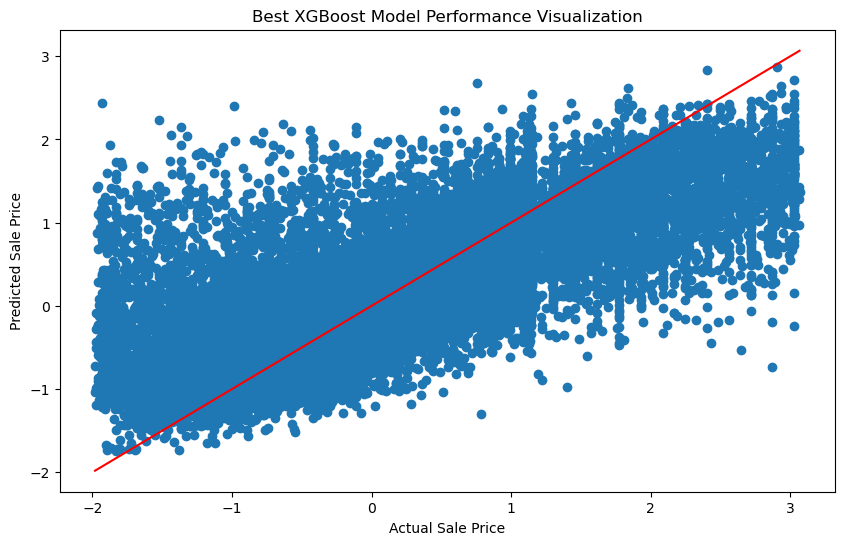

In [121]:

best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)

# Add a line for the perfect model
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Add labels and title
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Best XGBoost Model Performance Visualization')

# Show the plot
plt.show()


In [123]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(df_feature, df_target)

SVR()

In [127]:
from sklearn.metrics import mean_squared_error

# Make predictions
df_target_pred = regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.383738620520883


In [132]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


svm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])


In [133]:
param_grid = {
    'svr__C': [0.1, 1, 10, 100], 
    'svr__epsilon': [0.01, 0.1, 0.2, 0.5],
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid_search = GridSearchCV(svm_model, param_grid, cv=5)


## Conclusion

- This analysis provides a comprehensive overview of the NYC real estate market, specifically focusing on predicting sale prices for one to three-family residential units in Manhattan, Brooklyn, and Queens from 2009 to 2022. The XGBoost model, with tuned hyperparameters, demonstrated the best performance in predicting sale prices, with an MSE of 0.06 and an R-squared value of 0.84. The findings highlight the importance of considering various factors, such as borough, neighborhood, and property type, when assessing sale prices..


- However, it is important to acknowledge the limitations of this analysis, such as the focus on specific property types, the limited time range of the data, and the exclusion of certain external factors. Future work could focus on expanding the analysis to include a wider range of property types, incorporating more recent data, exploring the impact of external factors, and extending the coverage to other boroughs and areas within NYC. Overall, this analysis demonstrates the potential of machine learning techniques in predicting sale prices and provides valuable insights into the NYC real estate market. Further research and refinement of the model can improve accuracy.
